# Test for the TomoBox

In [31]:
import tomobox
import simulate
import numpy
%pylab inline

In [32]:
# Initialize a synthetic sinogram
im_sz = 256

tomo1 = tomobox.projections()
tomo1.meta.geometry.modifiers_reset()

tomo1.io.manual_init(src2obj = 100, det2obj = 100, theta_n = im_sz, 
                    theta_range = [0, 2*numpy.pi], det_width = im_sz, 
                    det_height = im_sz, det_pixel = [0.1, 0.1])

tomo2 = tomo1.copy()

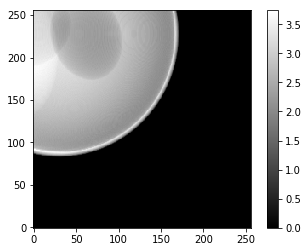

In [34]:
# Simulate data:
vol0 = simulate.phantom.shepp3d(im_sz +100)

tomo1.meta.geometry.modifiers['det_hrz'] = 100
tomo1.meta.geometry.modifiers['det_vrt'] = -100

simulate.tomography.project(vol0, tomo1)

# Display:
tomo1.display.slice(slice_num=100, dim_num=1)

# Save:
tomo1.io.save_projections('/export/scratch3/kostenko/Fast_Data/random_test/tomo1/')

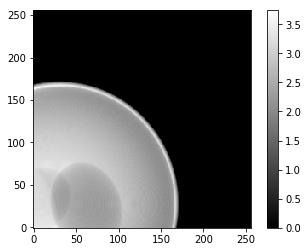

In [35]:
# Simulate data:
tomo2.meta.geometry.modifiers['det_hrz'] = 100
tomo2.meta.geometry.modifiers['det_vrt'] = 100

simulate.tomography.project(vol0, tomo2)

# Display:
tomo2.display.slice(slice_num=100, dim_num=1)

# Save:
tomo2.io.save_projections('/export/scratch3/kostenko/Fast_Data/random_test/tomo2/')

# Reconstruct it!!!

In [36]:
# Load data:
tomo1 = tomobox.projections()
tomo2 = tomobox.projections()

tomo1.io.manual_init(src2obj = 100, det2obj = 100, theta_n = im_sz, 
                    theta_range = [0, 2*numpy.pi], det_width = im_sz, 
                    det_height = im_sz, det_pixel = [0.1, 0.1])

tomo2.io.manual_init(src2obj = 100, det2obj = 100, theta_n = im_sz, 
                    theta_range = [0, 2*numpy.pi], det_width = im_sz, 
                    det_height = im_sz, det_pixel = [0.1, 0.1])

tomo1.io.read_raw('/export/scratch3/kostenko/Fast_Data/random_test/tomo1/')
tomo2.io.read_raw('/export/scratch3/kostenko/Fast_Data/random_test/tomo2/')

tomo1.meta.geometry.modifiers['det_hrz'] = 100
tomo1.meta.geometry.modifiers['det_vrt'] = -100

tomo2.meta.geometry.modifiers['det_hrz'] = 100
tomo2.meta.geometry.modifiers['det_vrt'] = 100

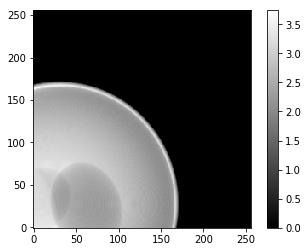

In [37]:
# Display:
tomo2.display.slice(slice_num=100, dim_num=1)

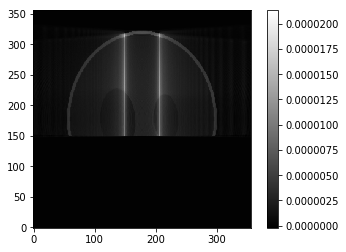

In [38]:
# Reconstruct based on one dataset:
tomo2.meta.geometry.modifiers['det_hrz'] = 100
tomo2.meta.geometry.modifiers['det_vrt'] = 100

vol = tomo2.reconstruct.FDK()
vol.display.slice(dim_num=1)

In [39]:
# Make a joint reconstrcution:
recon = tomobox.reconstruct(tomo1)
recon.add_projections(tomo2)


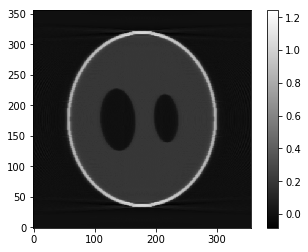

In [46]:
vol = recon.SIRT(iterations = 100)
vol.display.slice(dim_num=0)

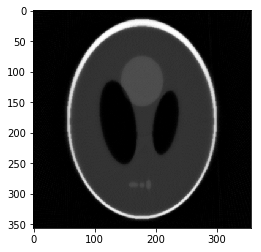

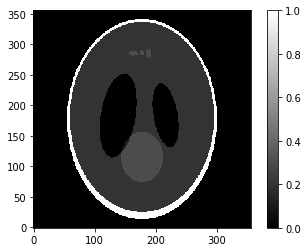

In [47]:
plt.figure()
plt.imshow(vol.data.data[vol.data.shape[1]//2, :,:], vmin = 0, vmax = 1, cmap = 'gray')
plt.show()

vol0.display.slice(356//2, dim_num=0)